<a href="https://colab.research.google.com/github/JDLiu/AIOTAtNCHU/blob/main/AIOT_Linear%2BSigmoid%2BPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*L12*-1 Linear Classification Regression using Pytorch nn.Linear with sigmoid(Perceptron)

Step 1: install lib and generates data

In [ ]:
!pip install torch
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

In [ ]:
model=nn.Linear(2,1)
def get_param():
  [w,b]=model.parameters()
  w1,w2=w.view(2)
  #item取出原形
  return w[0][0].item(),w[0][1].item(),b[0].item()
  #return w1.item(),w2.item(),b[0].item()

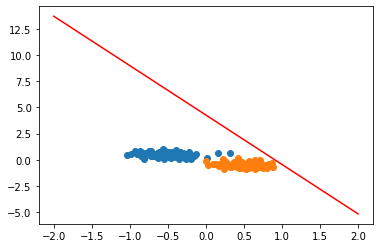

In [ ]:
nPoint=200
center=[[-0.5,0.5],[0.5,-0.5]]
data,y=datasets.make_blobs(n_samples=nPoint,random_state=2,centers=center,cluster_std=0.2)

def scatter_plot():
  plt.scatter(data[y==0,0],data[y==0,1])
  plt.scatter(data[y==1,0],data[y==1,1])

def plot_fit():
  x1=np.array([-2,2])
  w1,w2,b=get_param()
  x2=(w1*x1+b)/(-w2)
  plt.plot(x1,x2,'r')


scatter_plot()
plot_fit()

Step 2: Build model and some utility function

In [ ]:
#建立一個網路
class myModel(nn.Module):
  def __init__(self,ibn,oubt):
    super().__init__()
    self.linear=nn.Linear(ibn,oubt)
  def forward(self,x):
    x=self.linear(x)
    pred=torch.sigmoid(x)
    return pred
  def predict(self,x):
    #二分法
    predict=self.forward(x)
    if predict >0.05:
      return 1
    else:
      return 0

In [ ]:
model=myModel(2,1)
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.02)


Step 3:Train Model

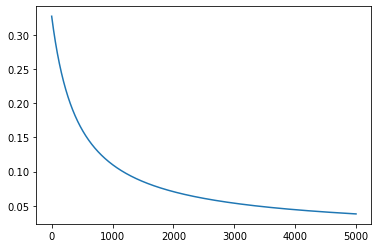

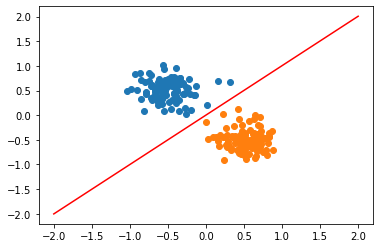

In [ ]:
epochs=5000
losses=[]
xx=torch.Tensor(data)
yy=torch.Tensor(y.reshape(nPoint,1))
for epoch in range(epochs):
  yPred=model.forward(xx)
  loss=criterion(yPred,yy)

  losses.append(loss.item())
  #權重歸零
  optimizer.zero_grad()
  #反饋Loss狀況到網路中
  loss.backward()
  #更新
  optimizer.step()

plt.plot(range(epochs),losses)
plt.show()
scatter_plot()
plot_fit()

複習: 使用python 自己寫linear regression


0.2350440846318661


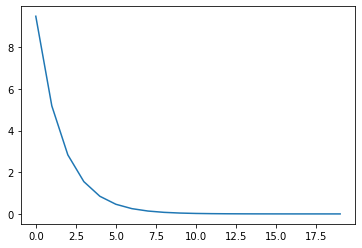

1.995799616240945 0.00029474664805795547 19


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

X = [1.0,2.0,3.0]
Y = [2.0,4.0,6.0]

w=random.random()
print(w)
def _forward(x):
  return x*w

def loss(x,y):
  _yPred=_forward(x)
  return (_yPred-y)*(_yPred-y)
  
def gradient(x,y):
  return 2*x*(w*x-y)


w_list=[]
J_list=[]
epoch_list=[]
alpha =0.01
minW=-100.0
minJ=1000.0
for epoch in range(20):
  l_sum=0
  for x,y in zip(X,Y):
    grad=gradient(x,y)
    w = w -alpha *grad
    _l=loss(x,y)
    l_sum +=_l
  
  if (l_sum < minJ):
    minW = w
    minJ=l_sum
  w_list.append(w)
  epoch_list.append(epoch)
  J_list.append(l_sum/len(X))
  

# plt.plot(w_list,J_list)
plt.plot(epoch_list,J_list)
plt.show()
print(minW,minJ,epoch)